# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights1.csv', index_col='Index')

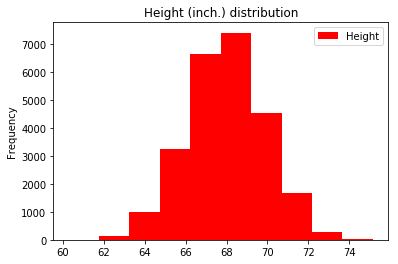

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [4]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

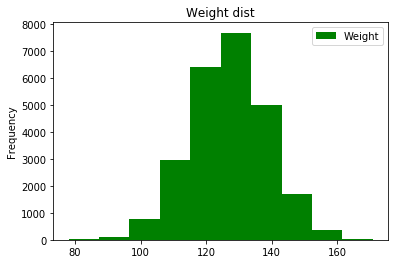

In [5]:
data.plot(y='Weight', kind="hist", title="Weight dist", color="g")

In [6]:
# Ваш код здесь

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)
data.head(5)

,Height,Weight,BMI
Index,,,
1,65.78331,112.9925,18.357573
2,71.51521,136.4873,18.762577
3,69.39874,153.0269,22.338895
4,68.21660,142.3354,21.504526
5,67.78781,144.2971,22.077581


**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

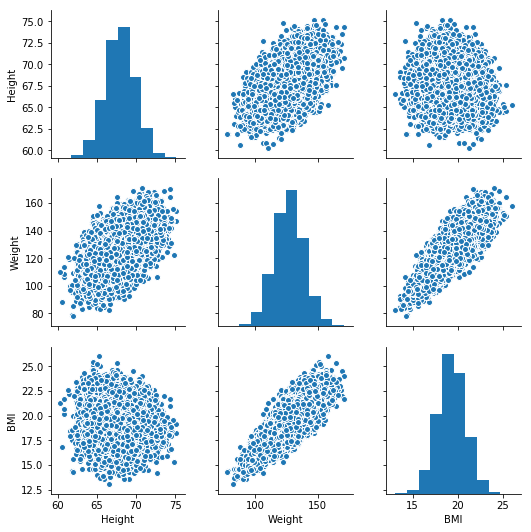

In [9]:
sns.pairplot(data)

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

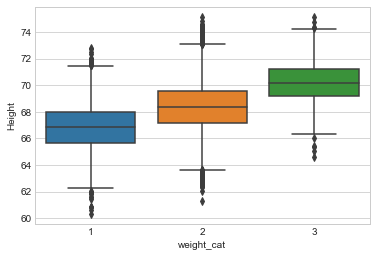

In [10]:
def weight_category(weight):
    if weight <120:
        return 1
    elif  weight>=150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
sns.set_style('whitegrid')
sns.boxplot(x='weight_cat', y='Height', data=data)

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

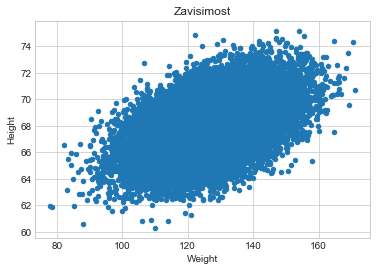

In [11]:
data.plot(y="Height", x="Weight", kind='Scatter', title="Zavisimost")

In [12]:
data.head(10)

,Height,Weight,BMI,weight_cat
Index,,,,
1,65.78331,112.9925,18.357573,1
2,71.51521,136.4873,18.762577,2
3,69.39874,153.0269,22.338895,3
4,68.21660,142.3354,21.504526,2
5,67.78781,144.2971,22.077581,2
6,68.69784,123.3024,18.368870,2
7,69.80204,141.4947,20.417428,2
8,70.01472,136.4623,19.571813,2
9,67.90265,112.3723,17.134953,1


In [13]:
N=data.shape[0] # Число строк. Если 1 - то столбцов

In [14]:
print(N)

25000


In [15]:
data[data["weight_cat"]==1].mean()

Height         66.827504
Weight        112.760277
BMI            17.772634
weight_cat      1.000000
dtype: float64

In [16]:
data.groupby('weight_cat')['Weight', "Height"].agg(np.mean)

,Weight,Height
weight_cat,,
1,112.760277,66.827504
2,131.582693,68.360396
3,154.336119,70.191953


In [17]:
for cat, sub_df in data.groupby("weight_cat"):
    print(cat)
    print(sub_df.head())

1
         Height     Weight        BMI  weight_cat
Index                                            
1      65.78331  112.99250  18.357573           1
9      67.90265  112.37230  17.134953           1
12     67.62333  114.14300  17.549036           1
15     68.27967  116.08660  17.506380           1
23     63.48115   97.90191  17.080425           1
2
         Height    Weight        BMI  weight_cat
Index                                           
2      71.51521  136.4873  18.762577           2
4      68.21660  142.3354  21.504526           2
5      67.78781  144.2971  22.077581           2
6      68.69784  123.3024  18.368870           2
7      69.80204  141.4947  20.417428           2
3
         Height    Weight        BMI  weight_cat
Index                                           
3      69.39874  153.0269  22.338895           3
57     70.40617  155.8987  22.111497           3
83     70.05147  155.3767  22.261195           3
139    73.90107  151.3913  19.489314           3
157    

In [23]:
pd.crosstab(data['weight_cat'], data["weight_cat"], values=data['Height'], aggfunc=np.mean, margins=True)

weight_cat,1,2,3,All
weight_cat,,,,
1,66.827504,NaN,NaN,66.827504
2,NaN,68.360396,NaN,68.360396
3,NaN,NaN,70.191953,70.191953
All,66.827504,68.360396,70.191953,67.993114


In [69]:
data.describe()

,Height,Weight,BMI,weight_cat
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,19.321455,1.755520
std,1.901679,11.660898,1.551895,0.484561
min,60.278360,78.014760,13.070826,1.000000
25%,66.704397,119.308675,18.278284,1.000000
50%,67.995700,127.157750,19.302198,2.000000
75%,69.272958,134.892850,20.357657,2.000000
max,75.152800,170.924000,26.023651,3.000000


In [79]:
def categorize(height):
    if height<65:
        return 1
    elif height>71:
        return 2
    else:
        return 3

data['height_cat']=data["Height"].apply(categorize)
data.head()

,Height,Weight,BMI,weight_cat,height_cat,is_high
Index,,,,,,
1,65.78331,112.9925,18.357573,1,3,0
2,71.51521,136.4873,18.762577,2,2,1
3,69.39874,153.0269,22.338895,3,3,1
4,68.21660,142.3354,21.504526,2,3,0
5,67.78781,144.2971,22.077581,2,3,0


In [80]:
pd.crosstab(data['weight_cat'], data['height_cat'])

height_cat,1,2,3
weight_cat,,,
1,996,45,5697
2,491,1187,15958
3,1,193,432


In [81]:
data['is_high']=data["Height"]>data["Height"].quantile(.75)

In [82]:
data.head()

,Height,Weight,BMI,weight_cat,height_cat,is_high
Index,,,,,,
1,65.78331,112.9925,18.357573,1,3,False
2,71.51521,136.4873,18.762577,2,2,True
3,69.39874,153.0269,22.338895,3,3,True
4,68.21660,142.3354,21.504526,2,3,False
5,67.78781,144.2971,22.077581,2,3,False


In [83]:
data['is_high']=(data["Height"]>data["Height"].quantile(.75)).astype('int64')

In [84]:
data.head()

,Height,Weight,BMI,weight_cat,height_cat,is_high
Index,,,,,,
1,65.78331,112.9925,18.357573,1,3,0
2,71.51521,136.4873,18.762577,2,2,1
3,69.39874,153.0269,22.338895,3,3,1
4,68.21660,142.3354,21.504526,2,3,0
5,67.78781,144.2971,22.077581,2,3,0


In [85]:
df=data.apply(np.mean)
print(df)

Height         67.993114
Weight        127.079421
BMI            19.321455
weight_cat      1.755520
height_cat      2.823960
is_high         0.250000
dtype: float64


## Задание 2. Минимизация квадратичной ошибки

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [32]:
def error (w1, w0):
    N=data.shape[0]
    result=0
    for index, row  in data.iterrows():
        result+=(row["Height"]-(w0+w1*row["Weight"]))**2
    return result



Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

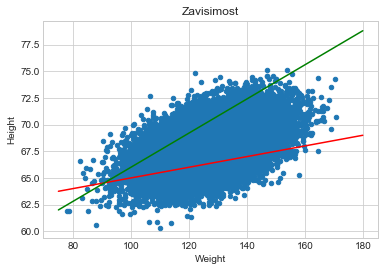

In [22]:
data.plot(y="Height", x="Weight", kind='Scatter', title="Zavisimost")
xx=np.linspace(75,180, 180)
plt.plot(xx, 60+0.05*xx, "r", xx, 50+0.16*xx, "g")

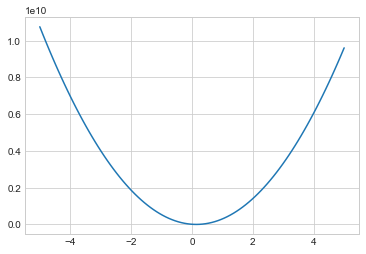

In [33]:
xxx=np.linspace(-5,5,100)
plt.plot(xxx, error(xxx,50))

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [26]:
import scipy.optimize

In [34]:
w0=50
w1_opt=scipy.optimize.minimize_scalar(error, bounds=(-5,5), method='bounded', args=(w0))


In [35]:
print(w1_opt)

     fun: 79512.21728699488
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.1410920372883444


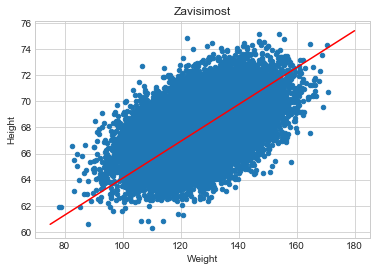

In [40]:
data.plot(y="Height", x="Weight", kind='Scatter', title="Zavisimost")
plt.plot(xx, 50+(w1_opt.x)*xx, "r")

In [41]:
print(error(w1_opt.x, 50))

79512.21728699488


При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [42]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

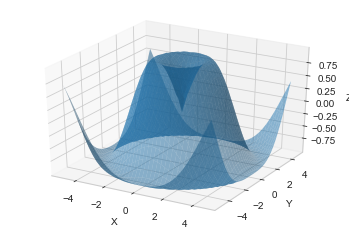

In [44]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

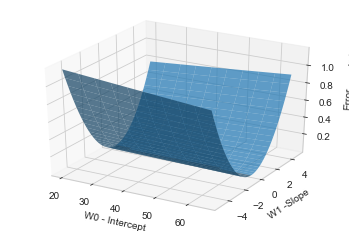

In [48]:
fig1=plt.figure()
ax1=fig1.gca(projection="3d")
W0=np.arange(20, 70, 5.0)
W1=np.arange(-5, 5, 0.25)
W0, W1=np.meshgrid(W0, W1)
ER=error(W1, W0)
surf1=ax1.plot_surface(W0, W1,ER, alpha=0.7)
ax1.set_xlabel("W0 - Intercept")
ax1.set_ylabel("W1 -Slope")
ax1.set_zlabel("Error")
plt.show()

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [55]:
def error1(w):
    return error(w[1], w[0])
opt=scipy.optimize.minimize(error1, [0.0,0.0], bounds=([-100,100], [-5,5]), method="L-BFGS-B")
print(opt)

      fun: 67545.28708528586
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00291038,  0.17462298])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([57.57171521,  0.08200697])


67545.28708528586


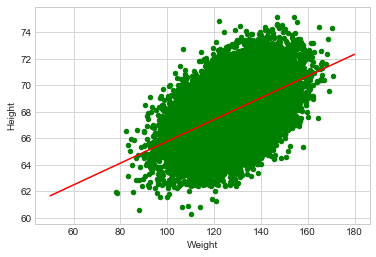

In [57]:
data.plot(x="Weight", y="Height", kind="scatter", c="g")
xx=np.linspace(50,180, 10)
plt.plot(xx, opt.x[0]+opt.x[1]*xx, c="r")
print(error(opt.x[1], opt.x[0]))

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)